## A gentle guide to how Beam Search enhances predictions, in plain English

Many NLP applications such as machine translation, chatbots, text summarization, and language models generate some text as their output. In addition applications like image captioning or automatic speech recognition (ie. Speech-to-Text) output text, even though they may not be considered pure NLP applications.

There are a couple of commonly used algorithms used by all of these applications as part of their last step to produce their final output.

- Greedy Search is one such algorithm. It is used often because it is simple and quick.
- The alternative is to use Beam Search. It is very popular because, although it requires more computation, it usually produces much better results.

### How NLP models generate output
Let’s take a sequence-to-sequence model as an example. These models are frequently used for applications such as machine translation.

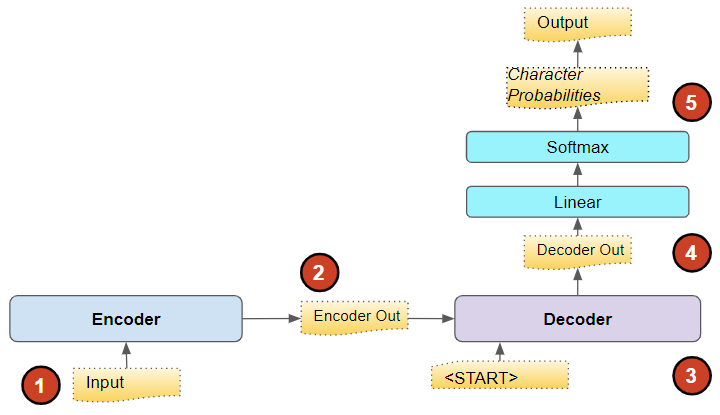

For instance, if this model were being used to translate from English to Spanish, it would take a sentence in the source language (eg. “You are welcome” in English) as input and output the equivalent sentence in the target language (eg. “De nada” in Spanish).

Text is a sequence of words (or characters), and the NLP model constructs a vocabulary consisting of the entire set of words in the source and target languages.

The model takes the source sentence as its input and passes it through an Embedding layer followed by an Encoder. The Encoder then outputs an encoded representation that compactly captures the essential features of the input.

This representation is then fed to a Decoder along with a “<START>” token to seed its output. The Decoder uses these to generate its own output, which is an encoded representation of the sentence in the target language.

This is then passed through an output layer, which might consist of some Linear layers followed by a Softmax. The Linear layers output a score of the likelihood of occurrence of each word in the vocabulary, at each position in the output sequence. The Softmax then converts those scores into probabilities.

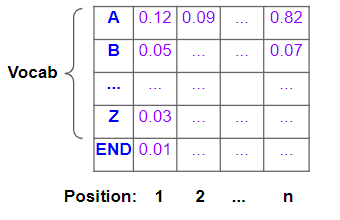

### Greedy Search
A fairly obvious way is to simply take the word that has the highest probability at each position and predict that. It is quick to compute and easy to understand, and often does produce the correct result.

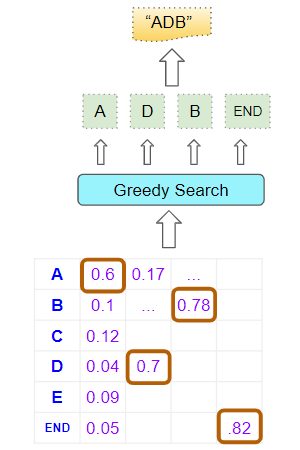

### Beam Search
Beam Search makes two improvements over Greedy Search.

    - With Greedy Search, we took just the single best word at each position. In contrast, Beam Search expands this and takes the best ’N’ words.
    - With Greedy Search, we considered each position in isolation. Once we had identified the best word for that position, we did not examine what came before it (ie. in the previous position), or after it. In contrast, Beam Search picks the ’N’ best sequences so far and considers the probabilities of the combination of all of the preceding words along with the word in the current position.
In other words, it is casting the “light beam of its search” a little more broadly than Greedy Search, and this is what gives it its name. The hyperparameter ’N’ is known as the Beam width.

Intuitively it makes sense that this gives us better results over Greedy Search. Because, what we are really interested in is the best complete sentence, and we might miss that if we picked only the best individual word in each position.

#### Beam Search — What it does
Let’s take a simple example with a Beam width of 2, and using characters to keep it simple.

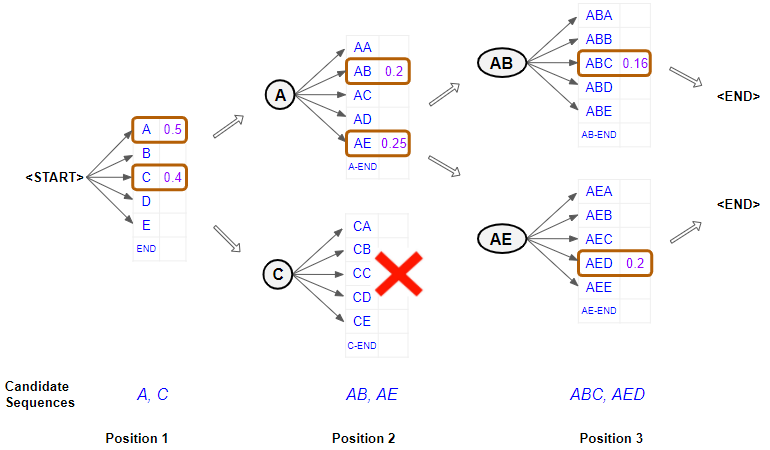

    1. First Position
        Consider the output of the model at the first position. It starts with the “<START>” token and obtains probabilities for each word. It now selects the two best characters in that position. eg. “A” and “C”.
    2. Second Position
        - When it comes to the second position, it re-runs the model twice to generate probabilities by fixing the possible characters in the first position. In other words, it constrains the characters in the first position to be either an “A” or a “C” and generates two branches with two sets of probabilities. The branch with the first set of probabilities corresponds to having “A” in position 1, and the branch with the second set corresponds to having “C” in position 1.
        - It now picks the overall two best character pairs based on the combined probability of the first two characters, from out of both sets of probabilities. So it doesn’t pick just one best character pair from the first set and one best character pair from the second set. eg. “AB” and “AE”.
    3. Third Position
        - When it comes to the third position, it repeats the process. It re-runs the model twice by constraining the first two positions to be either “AB” or “AE” and again generates two sets of probabilities.
        - Once more, it picks the overall two best character triplets based on the combined probability of the first three characters from both sets of probabilities. Therefore we now have the two best combinations of characters for the first three positions. eg. “ABC” and “AED”.
    4. Repeat till END token
        It continues doing this till it picks an “<END>” token as the best character for some position, which then concludes that branch of the sequence.
        - The sequence with the highest probability is the one that gives the best translation.

#### Beam Search — How it works
We now understand Beam Search at a conceptual level. Let’s go one level deeper and understand the details of how this works. We’ll continue with the same example and use a Beam width of 2.

Continuing with our sequence-to-sequence model, the Encoder and Decoder would likely be a recurrent network consisting of some LSTM layers. Alternately it could also be built using Transformers rather than a recurrent network.

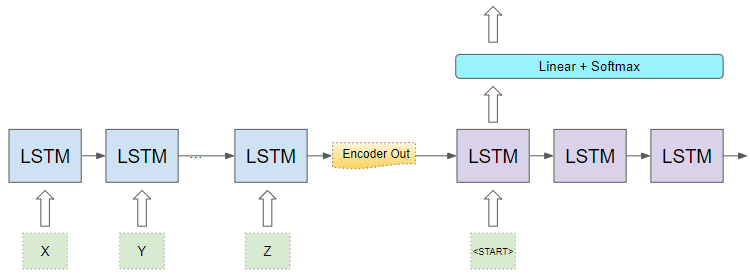

An LSTM-based Sequence-to-Sequence model (Image by Author)

Let’s focus on the Decoder component and the output layers.

    1. First Position
        In the first timestep, it uses the Encoder’s output and an input of a “<START>” token to generate the character probabilities for the first position.
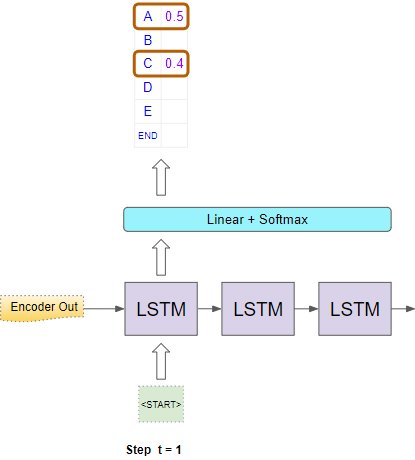
        Character probabilities for the first position (Image by Author)

        Now it picks two characters with the highest probability eg. “A” and “C”.
    2. Second Position
        For the second timestep, it then runs the Decoder twice using the Encoder’s output as before. Along with the “<START>” token in the first position, it forces the input of the second position to be “A” in the first Decoder run. In the second Decoder run, it forces the input of the second position to be “C”.

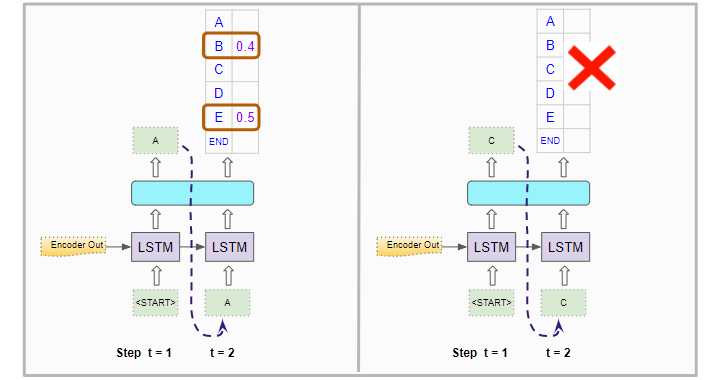

        It generates character probabilities for the second position. But these are individual character probabilities. It needs to compute the combined probabilities for character pairs in the first two positions. The probability of the pair “AB” is the probability of “A” occurring in the first position multiplied by the probability of “B” occurring in the second position, given that “A” is already fixed in the first position. The example below shows the calculation.

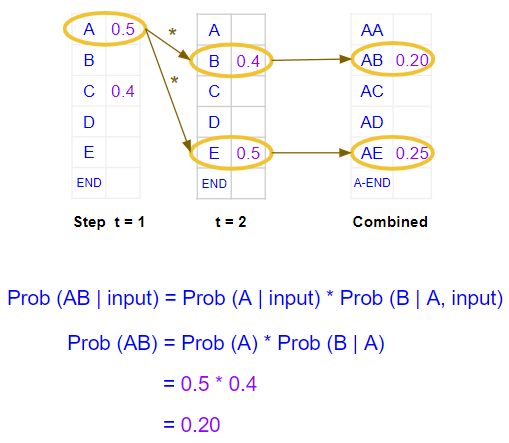

        It does this for both Decoder runs and picks the character pairs with the highest combined probabilities across both runs. It, therefore, picks “AB” and “AE”.

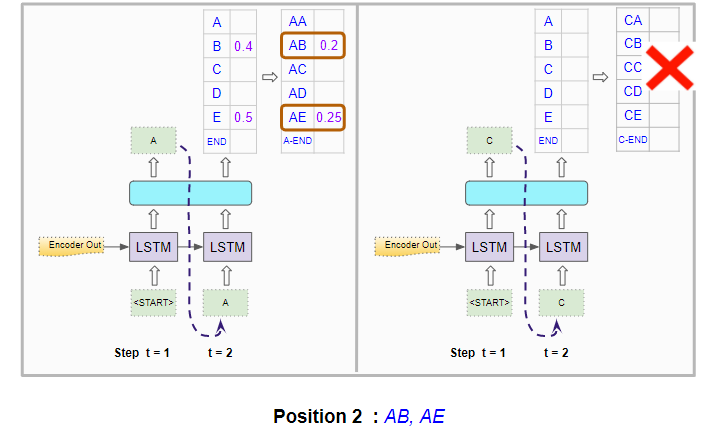

    3. Third position
        For the third time step, it again runs the Decoder twice as before. Along with the “<START>” token in the first position, it forces the input of the second position and third positions to be “A” and “B” respectively in the first Decoder run. In the second Decoder run, it forces the input of the second position and third positions to be “A” and “E” respectively.

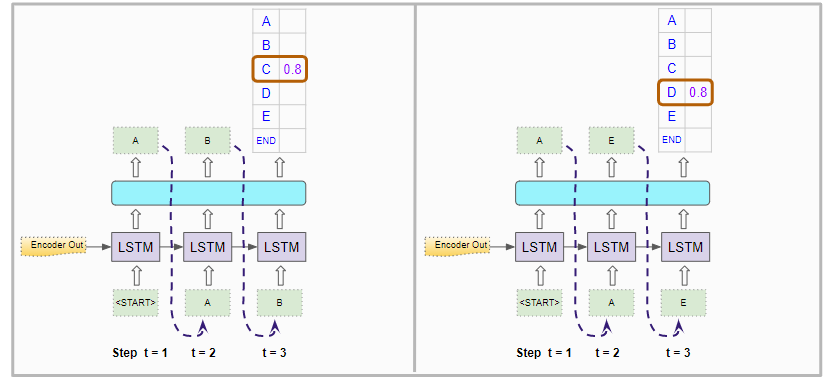

        It calculates the combined probability for character triples in the first three positions.

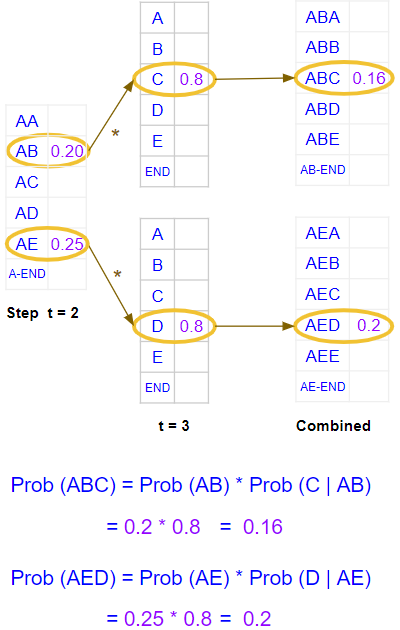

        It picks the two best ones across both runs, and therefore picks “ABC” and “AED”.

Repeat till END token

It repeats this process till it generates two best sequences that end with an “<END>” token.

It then chooses the sequence that has the highest combined probability to make its final prediction.
